<a href="https://colab.research.google.com/github/tarik611656/coursera/blob/main/Achievement_First_Data_Analyst_Technical_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:

from google.colab import files
uploaded = files.upload()

Saving F&P Sample Data Set.csv to F&P Sample Data Set (1).csv


In [207]:
import pandas as pd
import io
  
data = pd.read_csv(io.BytesIO(uploaded['F&P Sample Data Set.csv']))
print(data)

     Student ID                  School Name  ... Unnamed: 24  Unnamed: 25
0    10000001.0       Bushwick Middle School  ...         NaN          NaN
1    10000002.0       Bushwick Middle School  ...         NaN          NaN
2    10000003.0  Crown Heights Middle School  ...         NaN          NaN
3    10000004.0       Bushwick Middle School  ...         NaN          NaN
4    10000005.0       Bushwick Middle School  ...         NaN          NaN
..          ...                          ...  ...         ...          ...
994         NaN                          NaN  ...         NaN          NaN
995         NaN                          NaN  ...         NaN          NaN
996         NaN                          NaN  ...         NaN          NaN
997         NaN                          NaN  ...         NaN          NaN
998         NaN                          NaN  ...         NaN          NaN

[999 rows x 26 columns]


In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student ID     376 non-null    float64
 1   School Name    376 non-null    object 
 2   Grade Level    376 non-null    object 
 3   BOY F&P Score  279 non-null    float64
 4   EOY F&P Score  366 non-null    float64
 5   Unnamed: 5     0 non-null      float64
 6   Unnamed: 6     0 non-null      float64
 7   Unnamed: 7     0 non-null      float64
 8   Unnamed: 8     0 non-null      float64
 9   Unnamed: 9     0 non-null      float64
 10  Unnamed: 10    0 non-null      float64
 11  Unnamed: 11    0 non-null      float64
 12  Unnamed: 12    0 non-null      float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
 17  Unnamed: 17    0 non-null      float64
 18  Unnamed: 1

In [209]:
v1 = data.drop(columns=data.columns[5:26])
v2 = v1.drop(labels=range(376,999), axis=0)
print(v2)

     Student ID                  School Name  ... BOY F&P Score  EOY F&P Score
0    10000001.0       Bushwick Middle School  ...          11.0           16.0
1    10000002.0       Bushwick Middle School  ...          11.0           16.0
2    10000003.0  Crown Heights Middle School  ...          11.0           16.0
3    10000004.0       Bushwick Middle School  ...          11.0           16.0
4    10000005.0       Bushwick Middle School  ...          11.0           14.0
..          ...                          ...  ...           ...            ...
371  10000371.0       Bushwick Middle School  ...          10.0           16.0
372  10000372.0       Bushwick Middle School  ...           NaN           15.0
373  10000373.0       Bushwick Middle School  ...           NaN           18.0
374  10000374.0  Crown Heights Middle School  ...           NaN           19.0
375  10000375.0  Crown Heights Middle School  ...           NaN           21.0

[376 rows x 5 columns]


In [210]:
v2.nunique()

Student ID       375
School Name        4
Grade Level        4
BOY F&P Score     16
EOY F&P Score     16
dtype: int64

In [211]:
duplicate = v2[v2.duplicated()]
duplicate

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score
269,10000269.0,Bushwick Middle School,6,11.0,18.0


In [212]:
v3 = v2.drop(labels=269, axis=0)
v3['School Name'].unique()

array(['Bushwick Middle School', 'Crown Heights Middle School',
       'Bushwick MS', 'Crown Hghts Middle School'], dtype=object)

In [213]:
v4 = v3.replace('Bushwick MS', 'Bushwick Middle School')
v5 = v4.replace('Crown Hghts Middle School', 'Crown Heights Middle School')
v5.nunique()

Student ID       375
School Name        2
Grade Level        4
BOY F&P Score     16
EOY F&P Score     16
dtype: int64

In [214]:
v5['Grade Level'].unique()

array(['5', '6', '5th', '6th'], dtype=object)

In [367]:
v6 = v5.replace('5th', '5')
v7 = v6.replace('6th', '6')
v7.nunique()

Student ID       375
School Name        2
Grade Level        2
BOY F&P Score     16
EOY F&P Score     16
dtype: int64

In [368]:
v7['BOY F&P Score'].unique()

array([11.,  8., 13., 14., 12., 15., 10.,  9., 16., nan, 17., 18.,  7.,
        0., 20., 19., 21.])

In [369]:
v7['EOY F&P Score'].unique()

array([16., 14., 10., 11., 15., 12., nan, 17.,  9., 13., 18., 20., 19.,
       21., 22., 33., 23.])

In [370]:
import numpy as np
conditions1 = [
              (v7['Grade Level'] == '5' ) & (v7['BOY F&P Score'] >= 0) & (v7['BOY F&P Score'] <= 9),
              (v7['Grade Level'] == '5' ) & (v7['BOY F&P Score'] >= 10) & (v7['BOY F&P Score'] <= 11),
              (v7['Grade Level'] == '5' ) & (v7['BOY F&P Score'] >= 12) & (v7['BOY F&P Score'] <= 13),
              (v7['Grade Level'] == '5' ) & (v7['BOY F&P Score'] >= 14),
              (v7['Grade Level'] == '6' ) & (v7['BOY F&P Score'] >= 0) & (v7['BOY F&P Score'] <= 11),
              (v7['Grade Level'] == '6' ) & (v7['BOY F&P Score'] >= 12) & (v7['BOY F&P Score'] <= 13),
              (v7['Grade Level'] == '6' ) & (v7['BOY F&P Score'] >= 14) & (v7['BOY F&P Score'] <= 15),
              (v7['Grade Level'] == '6' ) & (v7['BOY F&P Score'] >= 16),
              (v7['BOY F&P Score'] == None)              
]

choices1 = [1, 2, 3, 4, 1, 2, 3, 4, np.nan]
BOYlevels = np.select(conditions1, choices1, default=np.nan)

conditions2 = [
              (v7['Grade Level'] == '5' ) & (v7['EOY F&P Score'] >= 0) & (v7['EOY F&P Score'] <= 11),
              (v7['Grade Level'] == '5' ) & (v7['EOY F&P Score'] >= 12) & (v7['EOY F&P Score'] <= 13),
              (v7['Grade Level'] == '5' ) & (v7['EOY F&P Score'] >= 14) & (v7['EOY F&P Score'] <= 15),
              (v7['Grade Level'] == '5' ) & (v7['EOY F&P Score'] >= 16),
              (v7['Grade Level'] == '6' ) & (v7['EOY F&P Score'] >= 0) & (v7['EOY F&P Score'] <= 13),
              (v7['Grade Level'] == '6' ) & (v7['EOY F&P Score'] >= 14) & (v7['EOY F&P Score'] <= 15),
              (v7['Grade Level'] == '6' ) & (v7['EOY F&P Score'] >= 16) & (v7['EOY F&P Score'] <= 17),
              (v7['Grade Level'] == '6' ) & (v7['EOY F&P Score'] >= 18),
              (v7['EOY F&P Score'] is None)              
]

choices2 = [1, 2, 3, 4, 1, 2, 3, 4, np.nan]
EOYlevels = np.select(conditions2, choices2, default=np.nan)

v7['BOY Proficiency'] = BOYlevels
v7['EOY Proficiency'] = EOYlevels
v7.head(40)

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score,BOY Proficiency,EOY Proficiency
0,10000001.0,Bushwick Middle School,5,11.0,16.0,2.0,4.0
1,10000002.0,Bushwick Middle School,5,11.0,16.0,2.0,4.0
2,10000003.0,Crown Heights Middle School,5,11.0,16.0,2.0,4.0
3,10000004.0,Bushwick Middle School,5,11.0,16.0,2.0,4.0
4,10000005.0,Bushwick Middle School,5,11.0,14.0,2.0,3.0
5,10000006.0,Bushwick Middle School,5,11.0,10.0,2.0,1.0
6,10000007.0,Bushwick Middle School,5,8.0,14.0,1.0,3.0
7,10000008.0,Crown Heights Middle School,5,13.0,14.0,3.0,3.0
8,10000009.0,Crown Heights Middle School,5,13.0,11.0,3.0,1.0
9,10000010.0,Crown Heights Middle School,5,14.0,15.0,4.0,3.0


In [371]:
conditions3 = [
              (v7['BOY Proficiency'] < v7['EOY Proficiency']),
              (v7['BOY Proficiency'] > v7['EOY Proficiency']),
              (v7['BOY Proficiency'] == v7['EOY Proficiency']),
              (v7['BOY Proficiency'] is None) or (v7['EOY Proficiency'] is None)
]

choices3 = ['Positive', 'Negative', 'Same', np.nan]
change = np.select(conditions3, choices3, default=np.nan)

v7['Proficiency Change'] = change
v7.tail(20)

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score,BOY Proficiency,EOY Proficiency,Proficiency Change
356,10000356.0,Crown Heights Middle School,6,15.0,21.0,3.0,4.0,Positive
357,10000357.0,Crown Heights Middle School,6,NaN,21.0,NaN,4.0,nan
358,10000358.0,Bushwick Middle School,6,14.0,18.0,3.0,4.0,Positive
359,10000359.0,Crown Heights Middle School,6,NaN,16.0,NaN,3.0,nan
360,10000360.0,Bushwick Middle School,6,12.0,20.0,2.0,4.0,Positive
361,10000361.0,Bushwick Middle School,6,11.0,18.0,1.0,4.0,Positive
362,10000362.0,Crown Heights Middle School,6,NaN,21.0,NaN,4.0,nan
363,10000363.0,Bushwick Middle School,6,15.0,20.0,3.0,4.0,Positive
364,10000364.0,Crown Heights Middle School,6,NaN,18.0,NaN,4.0,nan
365,10000365.0,Crown Heights Middle School,6,17.0,16.0,4.0,3.0,Negative


In [384]:
ch5b = v7.copy()
ch5b['Grade Level'] = ch5b['Grade Level'].mask(ch5b['Grade Level'].ne('5'))
ch5b['School Name'] = ch5b['School Name'].mask(ch5b['School Name'].ne('Crown Heights Middle School'))
ch5b_slices = ch5b.groupby(['School Name', 'BOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

ch5e = v7.copy()
ch5e['Grade Level'] = ch5e['Grade Level'].mask(ch5e['Grade Level'].ne('5'))
ch5e['School Name'] = ch5e['School Name'].mask(ch5e['School Name'].ne('Crown Heights Middle School'))
ch5e_slices = ch5e.groupby(['School Name', 'EOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

ch6b = v7.copy()
ch6b['Grade Level'] = ch6b['Grade Level'].mask(ch6b['Grade Level'].ne('6'))
ch6b['School Name'] = ch6b['School Name'].mask(ch6b['School Name'].ne('Crown Heights Middle School'))
ch6b_slices = ch6b.groupby(['School Name', 'BOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

ch6e = v7.copy()
ch6e['Grade Level'] = ch6e['Grade Level'].mask(ch6e['Grade Level'].ne('6'))
ch6e['School Name'] = ch6e['School Name'].mask(ch6e['School Name'].ne('Crown Heights Middle School'))
ch6e_slices = ch6e.groupby(['School Name', 'EOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

b5b = v7.copy()
b5b['Grade Level'] = b5b['Grade Level'].mask(b5b['Grade Level'].ne('5'))
b5b['School Name'] = b5b['School Name'].mask(b5b['School Name'].ne('Bushwick Middle School'))
b5b_slices = b5b.groupby(['School Name', 'BOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

b5e = v7.copy()
b5e['Grade Level'] = b5e['Grade Level'].mask(b5e['Grade Level'].ne('5'))
b5e['School Name'] = b5e['School Name'].mask(b5e['School Name'].ne('Bushwick Middle School'))
b5e_slices = b5e.groupby(['School Name', 'EOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

b6b = v7.copy()
b6b['Grade Level'] = b6b['Grade Level'].mask(b6b['Grade Level'].ne('6'))
b6b['School Name'] = b6b['School Name'].mask(b6b['School Name'].ne('Bushwick Middle School'))
b6b_slices = b6b.groupby(['School Name', 'BOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)

b6e = v7.copy()
b6e['Grade Level'] = b6e['Grade Level'].mask(b6e['Grade Level'].ne('6'))
b6e['School Name'] = b6e['School Name'].mask(b6e['School Name'].ne('Bushwick Middle School'))
b6e_slices = b6e.groupby(['School Name', 'EOY Proficiency'])['Grade Level'].count().unstack(fill_value=0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  del sys.path[0]


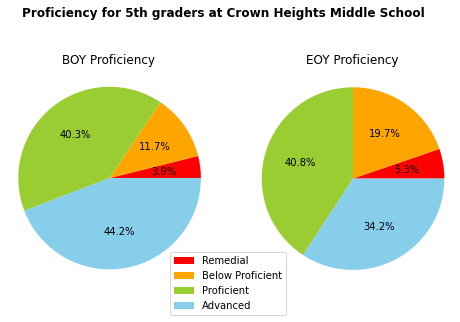

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


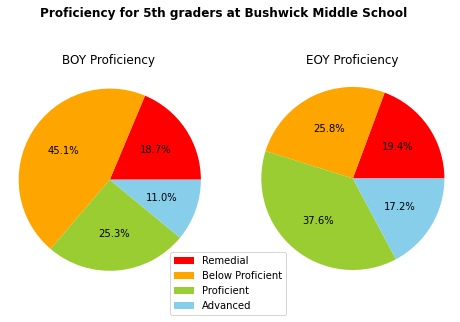

In [387]:
import matplotlib.pyplot as plt
labels = ['Remedial', 'Below Proficient', 'Proficient', 'Advanced']
colors = ['red', 'orange', 'yellowgreen', 'skyblue']

fig, axarr = plt.subplots(1, 2)
ax1 = axarr[0]
ax2 = axarr[1]

ax1.pie(ch5b_slices, autopct = '%1.1f%%', colors=colors)
ax1.axis('equal')
ax1.set_title('BOY Proficiency', y=.9)

ax2.pie(ch5e_slices, autopct = '%1.1f%%', colors=colors)
ax2.axis('equal')
ax2.set_title('EOY Proficiency', y=.9)

lgd1 = ax1.legend(labels, loc=(0.8,0))

fig.suptitle('Proficiency for 5th graders at Crown Heights Middle School', fontweight='bold')

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()


fig, axarr = plt.subplots(1, 2)
ax1 = axarr[0]
ax2 = axarr[1]

ax1.pie(b5b_slices, autopct = '%1.1f%%', colors=colors)
ax1.axis('equal')
ax1.set_title('BOY Proficiency', y=.9)

ax2.pie(b5e_slices, autopct = '%1.1f%%', colors=colors)
ax2.axis('equal')
ax2.set_title('EOY Proficiency', y=.9)

lgd1 = ax1.legend(labels, loc=(0.8,0))

fig.suptitle('Proficiency for 5th graders at Bushwick Middle School', fontweight='bold')

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


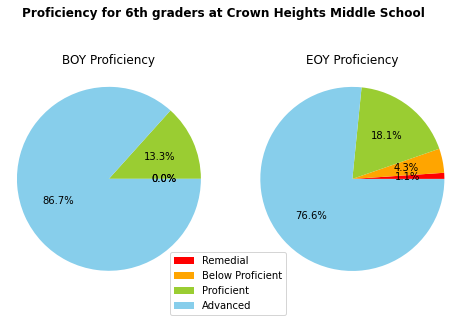

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


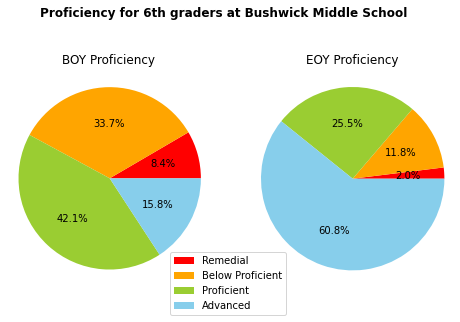

In [394]:
fig, axarr = plt.subplots(1, 2)
ax1 = axarr[0]
ax2 = axarr[1]

ax1.pie(ch6b_slices, autopct = '%1.1f%%', colors=colors)
ax1.axis('equal')
ax1.set_title('BOY Proficiency', y=.9)

ax2.pie(ch6e_slices, autopct = '%1.1f%%', colors=colors)
ax2.axis('equal')
ax2.set_title('EOY Proficiency', y=.9)

lgd1 = ax1.legend(labels, loc=(0.8,0))

fig.suptitle('Proficiency for 6th graders at Crown Heights Middle School', fontweight='bold')

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()


fig, axarr = plt.subplots(1, 2)
ax1 = axarr[0]
ax2 = axarr[1]

ax1.pie(b6b_slices, autopct = '%1.1f%%', colors=colors)
ax1.axis('equal')
ax1.set_title('BOY Proficiency', y=.9)

ax2.pie(b6e_slices, autopct = '%1.1f%%', colors=colors)
ax2.axis('equal')
ax2.set_title('EOY Proficiency', y=.9)

lgd1 = ax1.legend(labels, loc=(0.8,0))

fig.suptitle('Proficiency for 6th graders at Bushwick Middle School', fontweight='bold')

fig.set_figheight(5)
fig.set_figwidth(8)
plt.show()

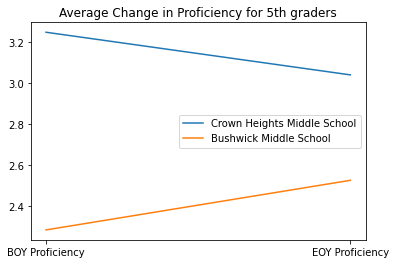

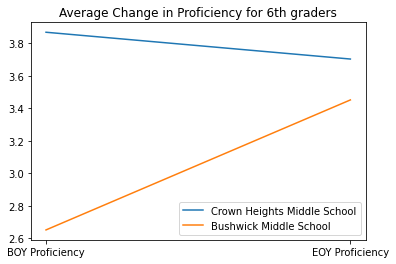

In [395]:
x = ['BOY Proficiency', 'EOY Proficiency']
ch5 = ch5b.dropna(subset=['School Name', 'Grade Level'])
ch6 = ch6b.dropna(subset=['School Name', 'Grade Level'])
b5 = b5b.dropna(subset=['School Name', 'Grade Level'])
b6 = b6b.dropna(subset=['School Name', 'Grade Level'])

ych5 = [ch5['BOY Proficiency'].mean(), ch5['EOY Proficiency'].mean()]
yb5 = [b5['BOY Proficiency'].mean(), b5['EOY Proficiency'].mean()]

plt.plot(x, ych5, label='Crown Heights Middle School')
plt.plot(x, yb5, label='Bushwick Middle School')
plt.title('Average Change in Proficiency for 5th graders')
plt.legend()
plt.show()

ych6 = [ch6['BOY Proficiency'].mean(), ch6['EOY Proficiency'].mean()]
yb6 = [b6['BOY Proficiency'].mean(), b6['EOY Proficiency'].mean()]

plt.plot(x, ych6, label='Crown Heights Middle School')
plt.plot(x, yb6, label='Bushwick Middle School')
plt.title('Average Change in Proficiency for 6th graders')
plt.legend()
plt.show()

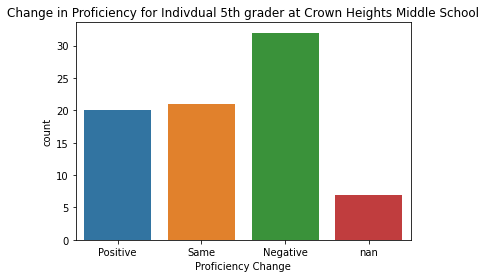

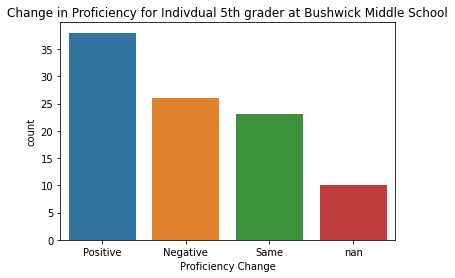

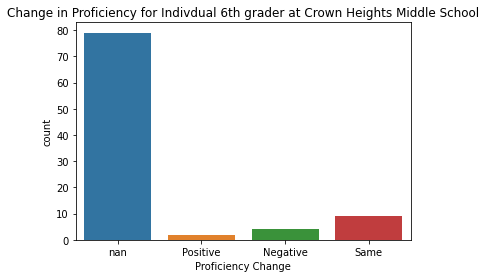

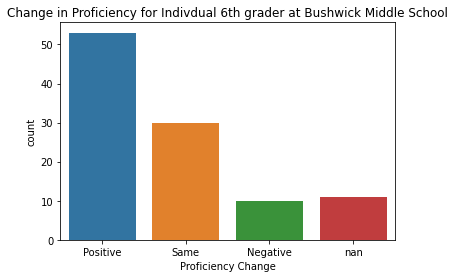

In [407]:
import seaborn as sns
sns.countplot(x='Proficiency Change', data=ch5)
plt.title('Change in Proficiency for Indivdual 5th grader at Crown Heights Middle School')
plt.show()

sns.countplot(x='Proficiency Change', data=b5)
plt.title('Change in Proficiency for Indivdual 5th grader at Bushwick Middle School')
plt.show()

sns.countplot(x='Proficiency Change', data=ch6)
plt.title('Change in Proficiency for Indivdual 6th grader at Crown Heights Middle School')
plt.show()

sns.countplot(x='Proficiency Change', data=b6)
plt.title('Change in Proficiency for Indivdual 6th grader at Bushwick Middle School')
plt.show()